<a href="https://colab.research.google.com/github/zalllrizalll/DataMining/blob/main/KNNClassified/SocialNetworkAds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import beberapa library yang dibutuhkan

In [9]:
import numpy as np # Komputasi Matrix
import matplotlib.pyplot as plt # Representasi data ke dalam bentuk grafik
import pandas as pd # Mengambil atau mengimport data dari luar seperti file.csv

Import file csv

In [10]:
dataset = pd.read_csv('Social Network Ads.csv') # Function read_csv() -> membaca file csv

Uji Coba Menampilkan 5 Data Teratas

In [11]:
dataset.head() # Function head() -> menampilkan 5 data teratas pada sebuah dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
x = dataset.iloc[:, [2,3]].values # variable x -> representasi dari atribut dataset kolom indeks 2 dan 3
y = dataset.iloc[:, -1].values # variable y -> representasi dari sebuah label pada dataset



*   : (Titik Dua) -> representasi ambil nilai semua data
*   [2,3] -> representasi atribut kolom indeks 2 dan 3
*   [-1] -> representasi label atau kolom indeks terakhir





In [ ]:
print(x) # Menampilkan semua data pada atribut kolom indeks 2 dan 3

In [ ]:
print(y) # Menampilkan semua data label atau kolom indeks terakhir pada dataset

Membagi sebuah Dataset menjadi 2 bagian : Data Training dan Data Testing

Import train_test_split dari library sklearn.model_selection

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

x_train, x_test, y_train, y_test -> Menyiapkan 4 buah variable untuk menampung tiap masing-masing data training dan data testing

test_size : Membagi sebagian data pada dataset yang ada untuk kebutuhan data testing

Data Training Atribut Kolom Indeks 2 dan 3

In [ ]:
print(x_train) # Menampilkan 300 data training atribut kolom indeks ke 2 dan 3 pada dataset

Data Testing Atribut Kolom Indeks 2 dan 3

In [ ]:
print(x_test) # Menampilkan 0.25 data atribut kolom indeks ke 2 dan 3 dataset untuk dijadikan data testing 

Data Training Atribut Kolom Indeks Terakhir yaitu label

In [ ]:
print(y_train) # Menampilkan 300 data training atribut kolom indeks terakhir pada dataset yaitu atribut label

Data Testing Atribut Kolom Indeks Terakhir yaitu label

In [ ]:
print(y_test) # Menampilkan 0.25 data atribut kolom indeks terakhir pada dataset yaitu atribut label untuk dijadikan data testing

Menghitung banyaknya data pada tiap masing - masing data training dan data testing

In [ ]:
len(x_train)

In [ ]:
len(x_test)

In [ ]:
len(y_train)

In [ ]:
len(y_test)

Setelah membagi dataset menjadi Data Training dan Data Testing hal yang perlu dilakukan selanjutnya yaitu :

Scalling Data -> diperlukan agar jarak antar data tidak terlalu jauh

Data yang perlu dilakukan Scalling Data yaitu atribut kolom indeks ke-2 dan ke-3. Atribut pada kolom label tidak perlu dilakukan Scalling Data karena nilai nya hanya berupa 0 dan 1

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # variable sc -> menampung function StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train) # Menampilan data training yang telah dilakukan Scalling Data pada atribut kolom indeks ke-2 dan ke-3

In [ ]:
print(x_test)  # Menampilan data testing yang telah dilakukan Scalling Data pada atribut kolom indeks ke-2 dan ke-3

Memanggil Function KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # Import library sklearn.neighbors untuk memanggil function KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

*   KNeighborsClassifier -> Function Algoritma KNN
*   n_neighbors : banyaknya data tetangga terdekat
*   metric = 'minkowski' -> algoritma yang disarankan untuk mencari data yang terdekat






Menentukan Prediksi dari Data Testing

In [22]:
y_pred = classifier.predict(x_test)

Evaluasi dan Validasi

In [23]:
from sklearn.metrics import confusion_matrix # Import library sklearn.metrics untuk memanggil function confusion_matrix
cm = confusion_matrix(y_test, y_pred) # variable cm -> menampung perhitungan matrix untuk y_test dan y_pred
print(cm)

[[64  4]
 [ 3 29]]


*   Matrix[0,0] -> Data yang diprediksi benar dan hasilnya memang benar
*   Matrix[0,1] -> Data yang diprediksi kurang tepat
*   Matrix[1,0] -> Data yang diprediksi kurang tepat
*   Matrix[1,1] -> Data yang diprediksi salah dan hasilnya memang salah





Menampilkan Akurasi yang Lebih Detail

In [24]:
from sklearn.metrics import classification_report # Import library sklearn.metrics untuk memanggil function classification_report
akurasi = classification_report(y_test, y_pred) # Variable akurasi -> menampung perhitungan data classification_report()
print(akurasi)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [26]:
from sklearn.metrics import accuracy_score # Import library sklearn.metrics untuk memanggil function accuracy_score
ac = accuracy_score(y_test, y_pred) # Variable akurasi -> menampung perhitungan data accuracy_score
print("prediksi benar   : ", cm[0,0]+cm[1,1], "data")
print("prediksi salah   : ", cm[0,1]+cm[1,0], "data")
print("akurasi          : ", ac*100, "%")

prediksi benar   :  93 data
prediksi salah   :  7 data
akurasi          :  93.0 %


Visualisasi Data Training menggunakan Grafik

C:\Users\Acer\AppData\Local\Temp\ipykernel_14484\3187038901.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)


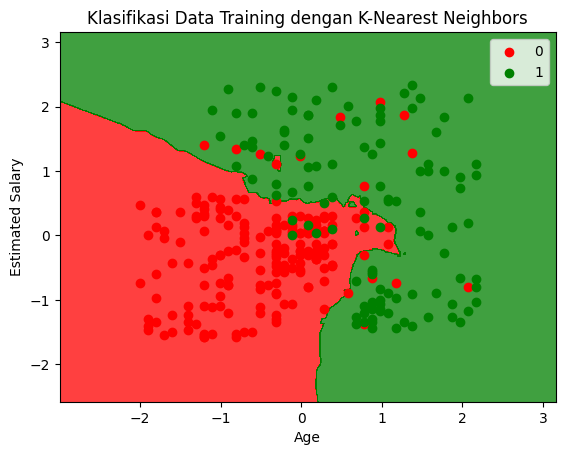

In [27]:
from matplotlib.colors import ListedColormap # Import library matplotlib.colors untuk memanggil function ListedColorMap
x_set, y_set = x_train, y_train 
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step = 0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max()+1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Klasifikasi Data Training dengan K-Nearest Neighbors')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

1. Import library matplotlib.colors untuk memanggil function ListedColorMap
2. Variable x_set : Menampung value x_train
3. Variable y_set : Menampung value y_train
4. x1 : Variable menampung value untuk indeks kolom ke-2 yaitu 'Age'
5. x2 : Variabel menampung value untuk indeks kolom ke-3 yaitu 'Estimated Salary'
6. plt.xlim(x1.min(), x1.max()) -> Mengambil seluruh data yang terdapat pada kolom 'Age'
7. plt.ylim(x2.min(), x2.max()) -> Mengambil seluruh data yang terdapat pada kolom 'Estimated Salary'
8. plt.show() -> Menampilkan data sebaran menggunakan visualisasi grafik



Visualisasi Data Testing menggunakan Grafik

C:\Users\Acer\AppData\Local\Temp\ipykernel_14484\1649018674.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)


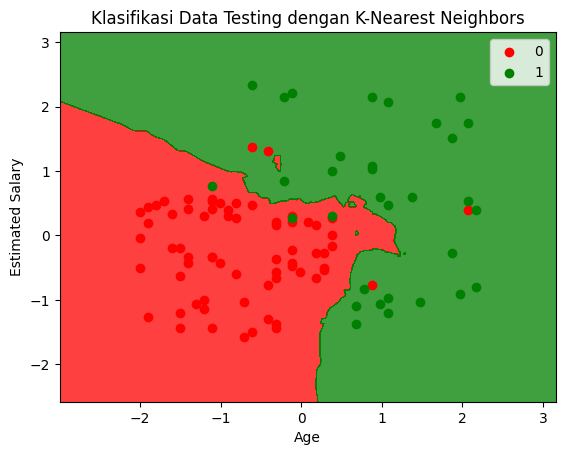

In [28]:
from matplotlib.colors import ListedColormap # Import library matplotlib.colors untuk memanggil function ListedColorMap
x_set, y_set = x_test, y_test 
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step = 0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max()+1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Klasifikasi Data Testing dengan K-Nearest Neighbors')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

1. Import library matplotlib.colors untuk memanggil function ListedColorMap
2. Variable x_set : Menampung value x_test
3. Variable y_set : Menampung value y_test
4. x1 : Variable menampung value untuk indeks kolom ke-2 yaitu 'Age'
5. x2 : Variabel menampung value untuk indeks kolom ke-3 yaitu 'Estimated Salary'
6. plt.xlim(x1.min(), x1.max()) -> Mengambil seluruh data yang terdapat pada kolom 'Age'
7. plt.ylim(x2.min(), x2.max()) -> Mengambil seluruh data yang terdapat pada kolom 'Estimated Salary'
8. plt.show() -> Menampilkan data sebaran menggunakan visualisasi grafik